In [1]:
import importlib

import requests
from bs4 import BeautifulSoup
import re
# from Classes.RouteClass import Route
# from Classes.RouteClassKP import RouteKN
# from Classes.GuideClass import Guide
import json
import Classes
# importlib.reload(Classes)

In [2]:
session = requests.session()

In [3]:
headers = {
    'authority': 'www.kith.com',
    'cache-control': 'max-age=0',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.106 Safari/537.36',
    'sec-fetch-dest': 'document',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-user': '?1',
    'accept-language': 'en-US,en;q=0.9',
}

## Вытащил последнюю страницу

In [177]:
start_url = "https://turclub-pik.ru/search/"
start_response = session.get(start_url, headers=headers)
# start_response.status_code
start_soup = BeautifulSoup(start_response.text, 'html.parser')
# last_page_num = int(start_soup.find(attrs={'class':'pagination'}).find(attrs={'class':'active disabled'}).text)

In [180]:
routes_url = [elem for elem in start_soup.find(attrs={'class': 'columns is-multiline mb-6'}).children]

In [186]:
routes_url[0].find(attrs={'itemprop':'url'}).get('href')

'/pohod/semeinaya-turciya-fridaiving-i-pokhod/2416/'

## Работаем со страницами

In [4]:
route_url = "https://turclub-pik.ru"

In [5]:
page_url = "https://www.vpoxod.ru/route?per-page=48&page=1"
page_response = session.get(page_url, headers=headers)

In [6]:
page_response.status_code

200

In [7]:
page_soup = BeautifulSoup(page_response.text,'html.parser')

In [8]:
hike_list = page_soup.find_all(attrs={'class':'main_page_hike_title'})
hike_list_urls = [(route_url+route.find()['href']) for route in hike_list]

In [9]:
len(hike_list_urls)

48

## Работаем с походом 

In [187]:
# route_page = hike_list_urls[8]
# route_page = 'https://www.vpoxod.ru/route/podmoskovje/velo_Tanki#content-top'
route_page = 'https://turclub-pik.ru/pohod/semeinaya-turciya-fridaiving-i-pokhod/2416/'
print(route_page)

https://turclub-pik.ru/pohod/semeinaya-turciya-fridaiving-i-pokhod/2416/


In [190]:
route_ = session.get(route_page, headers=headers)

In [191]:
route_soup = BeautifulSoup(route_.text, 'html.parser')

In [197]:
route_soup.find(attrs={'class': 'title name'}).text

'Семейная Турция: фридайвинг и поход (0+)'

In [201]:
route_soup.find(attrs={'itemprop': 'location'}).find(attrs = {'itemprop':'name'}).get('content')

'Турция'

In [217]:
temp = route_soup.find(attrs={'class': 'info'}).find_all(attrs={'class':'item'})

In [223]:
[col.text for col in temp]

['Длительность \n      10\n      дней',
 'Длина \n      45 км',
 '\n      Сложность\n       \n      1/5',
 'Размер группы \n      50 чел']

In [221]:
[i.text for i in temp if 'Длительность' in i.text][0]

'Длительность       10      дней'

In [213]:
temp = [col for col in route_soup.find(attrs={'class': 'info'})]

In [229]:
[tag.text for tag in route_soup.find(attrs={'class': 'tags'}).find_all('a')]

['\n    Турция\n  ',
 '\n    Водные\n  ',
 '\n    С детьми\n  ',
 '\n    С морем\n  ',
 '\n    Без рюкзаков\n  ',
 '\n    Фридайвинг\n  ',
 '\n    Творческие выезды\n  ',
 '\n    В домиках\n  ',
 '\n    Активные туры\n  ',
 '\n    Походы в июне\n  ']

In [231]:
route_soup.find('meta', attrs={b
                              }).get('content')

'Авторский проект - семейный фридайвинг плюс поход по Ликийской тропе в Турции! Всё самое лучшее для вас.&nbsp;Прохождение курса позволит нырять легко, безопасно и с удовольствием, освоить технику ныряния в ластах и без ласт, овладеть техниками расслабления на суше и в воде.&nbsp;С каждым ныряльщиком будет вестись индивидуальная работа: курс подойдет и продвинутым фридайверам и тем, кто никогда не пробовал нырять.&nbsp;На сухопутном пути нас ждёт:&nbsp;каньон&nbsp;Гармонии,&nbsp;черепашьи пляжи, вечные огни на горе Химера, пляжи Чирали, руины Олимпоса, творческие занятия, увлекательные квесты.'

In [241]:
temp = route_soup.find(attrs={'class': 'days'}).find_all(attrs={'class': re.compile('columns day')})

In [258]:
temp[8]

<div class="columns day is-hidden" data-v-24a8df5e=""><div class="column is-2 has-divider" data-v-24a8df5e=""><h3 class="name" data-v-24a8df5e="">День 9-ый</h3></div> <div class="column" data-v-24a8df5e=""><div class="description" data-v-24a8df5e="">День глубины. Рассвет встречаем на корабле. Обновляем рекорды погружений, ловим новые ощущения, работаем над техникой и расслаблением. После йога-нидры вы должны поймать правильное состояние под водой. Детское творчество. Вкусный обед на корабле и возвращение домой. Вечером дети творят, слушают лекцию по фридайвингу и играют, взрослые занимаются йогой. После свободного плавания и ужина собираемся у костра для песен, разговоров и сказки. </div> <div class="photos" data-v-24a8df5e=""><a class="photo" data-fancybox="roadday-9" data-v-24a8df5e="" href="/resize/2000/-/uploads/track_day_img/2020/04/20/190613_019.jpg"><figure class="image is-fixed-sizes" data-v-24a8df5e="" data-v-a869bd84="" itemscope="itemscope" itemtype="http://schema.org/ImageO

In [269]:
'\n'.join([i.text for i in temp[2].find_all('div') if i.get('class')[0] not in ['photos','description']])

'День 3-ый\nУтренняя дыхательная гимнастика Сидерского и специальные фридайверские упражнения на увеличение объёма лёгких, подвижность грудной клетки и эластичность диафрагмы для взрослых. Дети трудятся и растягиваются на горке с потрясающим видом на горы и рассветное море. После завтрака собираемся на пляже. Взрослые отрабатывают технику ныряния способом дельфин, дети - после продуктивной тренировки ищут подводные сокровища и творят в travel book. После полуденного отдыха у детей занятия бикробиологии с микроскопом - изучают планктон, а у взрослых лекция по фридайвингу на суше. Перед закатом отправляемся в древний город Олимпос, чтобы осмотреть руины и найти пиратские сокровища. Игра по станциям для детей. Пираты здесь действительно жили долгое время. Историю города вам расскажет дева с голубым амулетом. Возвращаемся в темноте, не забудьте фонарики.                      '

In [289]:
temp = route_soup.find(attrs={'class': 'aside'}).find_all('a', attrs={'class': 'team-member'})

In [295]:
temp[0].find(attrs={'itemprop': 'contentUrl'}).get('content')

'https://turclub-pik.ru/crop/40/40/uploads/instructors_img/Screenshot_1_g0m2rtm.png'

In [292]:
temp[0].find(attrs={'class': 'name'}).text

'Валя Афанасьев'

In [314]:
temp = route_soup.find_all('span', attrs={'itemtype': 'http://schema.org/Event'})

In [318]:
temp[0]

<span class="microdata-block is-hidden" data-v-6a891e77="" itemscope="itemscope" itemtype="http://schema.org/Event"><span itemprop="image" itemscope="itemscope" itemtype="http://schema.org/ImageObject"><meta content="800" itemprop="width"/> <meta content="360" itemprop="height"/> <img itemprop="contentUrl" src="https://turclub-pik.ru/crop/800/360/uploads/track_img/HKmns2QxGoQ.jpg"/></span> <span itemprop="name">Семейная Турция: фридайвинг и поход (0+)</span> <span itemprop="offers" itemscope="itemscope" itemtype="http://schema.org/Offer"><link href="http://schema.org/InStock" itemprop="availability"/> <meta content="15" itemprop="inventoryLevel"/> <span content="400" itemprop="price"></span> <span content="USD" itemprop="priceCurrency"></span></span> <a href="https://turclub-pik.ru/pohod/semeinaya-turciya-fridaiving-i-pokhod/2416/" itemprop="url"></a> <meta content="2021-06-01" itemprop="startDate"/> <meta content="2021-06-10" itemprop="endDate"/> <span itemprop="location" itemscope="i

In [308]:
temp[1].find('meta', attrs={'itemprop': 'startDate'}).get('content')

'2021-09-10'

In [309]:
temp[1].find('meta', attrs={'itemprop': 'endDate'}).get('content')

'2021-09-19'

In [311]:
temp[0].find('span', attrs={'itemprop': 'price'}).get('content')

'400'

In [312]:
temp[0].find('span', attrs={'itemprop': 'priceCurrency'}).get('content')

'USD'

In [275]:
temp = route_soup.find(attrs={'class': 'gallery'}).find_all('a')

In [282]:
['https://turclub-pik.ru'+tag.get('href') for tag in temp]

['https://turclub-pik.ru/resize/2000/-/uploads/track_img/2019/02/12/asRarhYgWrc.jpg',
 'https://turclub-pik.ru/resize/2000/-/uploads/track_day_img/2020/04/20/mVs9vaFAJRk.jpg',
 'https://turclub-pik.ru/resize/2000/-/uploads/track_day_img/2020/04/20/xgcRK_ia4U0.jpg',
 'https://turclub-pik.ru/resize/2000/-/uploads/track_day_img/2020/04/20/HxCG8JrFoxk.jpg',
 'https://turclub-pik.ru/resize/2000/-/uploads/track_day_img/2020/04/20/ewQ7f2pcjQU.jpg',
 'https://turclub-pik.ru/resize/2000/-/uploads/track_day_img/2020/04/20/lCaxJgtHYtQ.jpg',
 'https://turclub-pik.ru/resize/2000/-/uploads/track_day_img/2020/04/20/QBJaFAGUjFs.jpg',
 'https://turclub-pik.ru/resize/2000/-/uploads/track_day_img/2020/04/20/wClurCgRI5I.jpg',
 'https://turclub-pik.ru/resize/2000/-/uploads/track_day_img/2020/04/20/9Fm-ciFObbE.jpg',
 'https://turclub-pik.ru/resize/2000/-/uploads/track_day_img/2020/04/20/d4xY4Fy8apc.jpg',
 'https://turclub-pik.ru/resize/2000/-/uploads/track_day_img/2020/04/20/UEDCRwYrSC8.jpg',
 'https://turc

In [281]:
temp[0].find('meta', attrs={'itemprop': 'contentUrl'}).get('content')

'https://turclub-pik.ru/crop/180/180/uploads/track_img/2019/02/12/asRarhYgWrc.jpg'

In [64]:
route_object = Classes.RouteClassKP.RouteKP()

In [65]:
route_object.parse_page(route_page, session,headers)

In [67]:
route_object.to_json()

{'url': 'https://www.vpoxod.ru/route/podmoskovje/splav_Kirzach#tabs',
 'name': 'Сплав по реке Киржач на байдарках с баней на берегу - Московская область',
 'region': 'Регион:Подмосковье (все походы в этом регионе)',
 'distance': 'Длина: 35 км ',
 'level': 'Сложность:легкий, опыт не обязателен ',
 'type': ['Поход с палатками',
  'Водный',
  'На байдарках',
  'Выходного дня',
  'можно взять с собой детей от 3 лет'],
 'duration': 'Длительность: 2 дня/2 ночи ',
 'is_children': 'Участие с детьми: можно взять с собой детей от 3 лет ',
 'short_description': 'Представьте себе настоящее природное царство, богатое на живописные красоты и всякую живность: бобры, дикие утки, белки. Присоединяйтесь! Эта река открывает великолепные пейзажи за каждым поворотом. В этом удивительном водном туре выходного дня нас покорит природа Подмосковья. А безупречная организация и высококлассные гиды сделают путешествие незабываемым и очень насыщенным. Активные туры прекрасны не только потому, что мы полностью погр

In [66]:
route_object.tabs_title_url

[<a class="active" href="/route/podmoskovje/splav_Kirzach#tabs"><span class="img"><i class="fa fa-info-circle fa-lg"></i></span><span class="tab_item">Информация</span></a>,
 <a href="/route/podmoskovje/splav_Kirzach/about#tabs"><span class="img"><i class="fa fa-compass fa-lg"></i></span><span class="tab_item">Маршрут</span></a>,
 <a href="/route/podmoskovje/splav_Kirzach/gallery#tabs"><span class="img"><i class="fa fa-camera fa-lg"></i></span><span class="tab_item">Фото (45)</span></a>,
 <a href="/route/podmoskovje/splav_Kirzach/faq#tabs"><span class="img"><i class="fa fa-lightbulb-o fa-lg"></i></span><span class="tab_item">Вопрос / Ответ</span></a>,
 <a href="/route/podmoskovje/splav_Kirzach/responses#tabs"><span class="img"><i class="fa fa-comments fa-lg"></i></span><span class="tab_item">Отзывы (131)</span></a>]

# Статистика 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
import json

In [39]:
kp_routes = pd.read_json('data/kp_parsed_routes_20210529_1009.txt', 
#                          orient='table',
                         lines=True,
#                          dtype = None,
                         encoding='utf-8')

ValueError: Unexpected character found when decoding array value (2)

In [46]:
with open('data/kp_parsed_routes_20210529_1009.txt','r',encoding='utf-8') as f:
#     kp_routes = f.readlines()
    kp_routes = json.load(f)

JSONDecodeError: Extra data: line 2 column 1 (char 2740)

In [41]:
kp_routes_evaled = [eval(line) for line in kp_routes]

SyntaxError: invalid syntax (<string>, line 1)

In [52]:
kp_routes_df = pd.DataFrame(kp_routes_evaled)

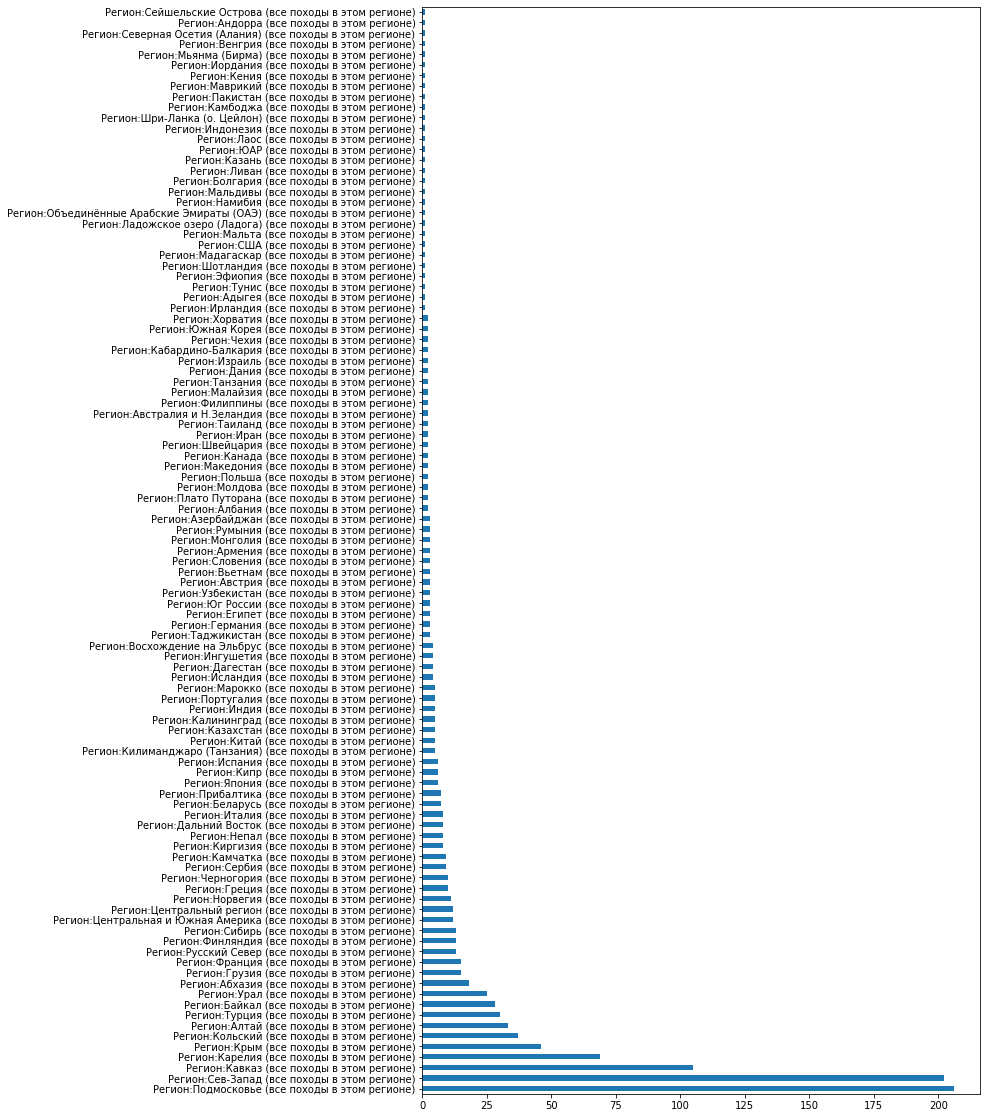

In [62]:
plt.figure(figsize=(10,20))
kp_routes_df.region.value_counts().plot.barh()
plt.show()

In [28]:
print(eval(kp_routes[-1])['short_description'])

Мы побываем в одном из самых красивых уголков Туапсинского района. Пройдем по красивейшему лесу, тихим горным и лесным тропам, а главное - посетим вершину горы Лысая, 30-ти метровый водопад у истоков реки Псекупс и поднимемся на еще одну красивую вершину горы Хлебушко! С нее открываются великолепная панорама на которой видны горы Севри, Фаше, Псиф и Почепсуха.

Гора Лысая, на самом деле совсем не лысая, а поросшая густой растительностью, среди которой есть красивейшие пицундские сосны. Дорога на вершину высотой 423 метров, для кого-то может стать испытанием, но это того стоит: с нее открывается волшебный вид на окрестности, а при хорошей погоде — на горы Индюк, Семиглавую, Оштен, Пшехо-Су и даже на Черное море!


AttributeError: 'str' object has no attribute 'read'